In [1]:
import mne
import os

def concat_dataset(subjects, num_blocks):
    raws = []
    # base_path = "E:\Thesis\HybridSpeller\\simple_ssvep_v2\\record"
    base_path = r"C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record"

    for subject in subjects:
        for i in range(0,num_blocks):
            print(subject)
            path = os.path.join(base_path, subject, f"{subject}{i}.fif")
            print("Here is the path")
            print(path)
            raw = mne.io.read_raw_fif(path, preload = True)
            raw.notch_filter([50,100], trans_bandwidth = 3)
            raw.filter(4,77)
            raw = mne.io.RawArray(raw._data[:,10*250:-10*250], raw.info)
            raws.append(raw)
    raw = mne.concatenate_raws(raws)
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)
    print(raw.info['ch_names'])
    print(raw.info['sfreq'])
    return raw

Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test1.fif...
    Range : 0 ... 13810 =      0.000 ...    55.240 secs
Ready.
Reading 0 ... 13810  =      0.000 ...    55.240 secs...
(9, 250)
Creating RawArray with float64 data, n_channels=9, n_times=250
    Range : 0 ... 249 =      0.000 ...     0.996 secs
Ready.
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 1.50 Hz
- Upper transition bandwidth: 1.50 Hz
- Filter length: 551 samples (2.204 sec)



C:\Users\bci\AppData\Local\Temp\ipykernel_8832\3360246806.py:2: RuntimeWarning: This filename (C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw =  mne.io.read_raw_fif(fname,  preload = True)
C:\Users\bci\AppData\Local\Temp\ipykernel_8832\3360246806.py:6: RuntimeWarning: filter_length (551) is longer than the signal (250), distortion is likely. Reduce filter length or filter a longer signal.
  raw_new.notch_filter([50,100], trans_bandwidth = 3)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 77 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 77.00 Hz
- Upper transition bandwidth: 19.25 Hz (-6 dB cutoff frequency: 86.62 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\bci\AppData\Local\Temp\ipykernel_8832\3360246806.py:7: RuntimeWarning: filter_length (413) is longer than the signal (250), distortion is likely. Reduce filter length or filter a longer signal.
  raw_new.filter(4,77)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s r

Using matplotlib as 2D backend.


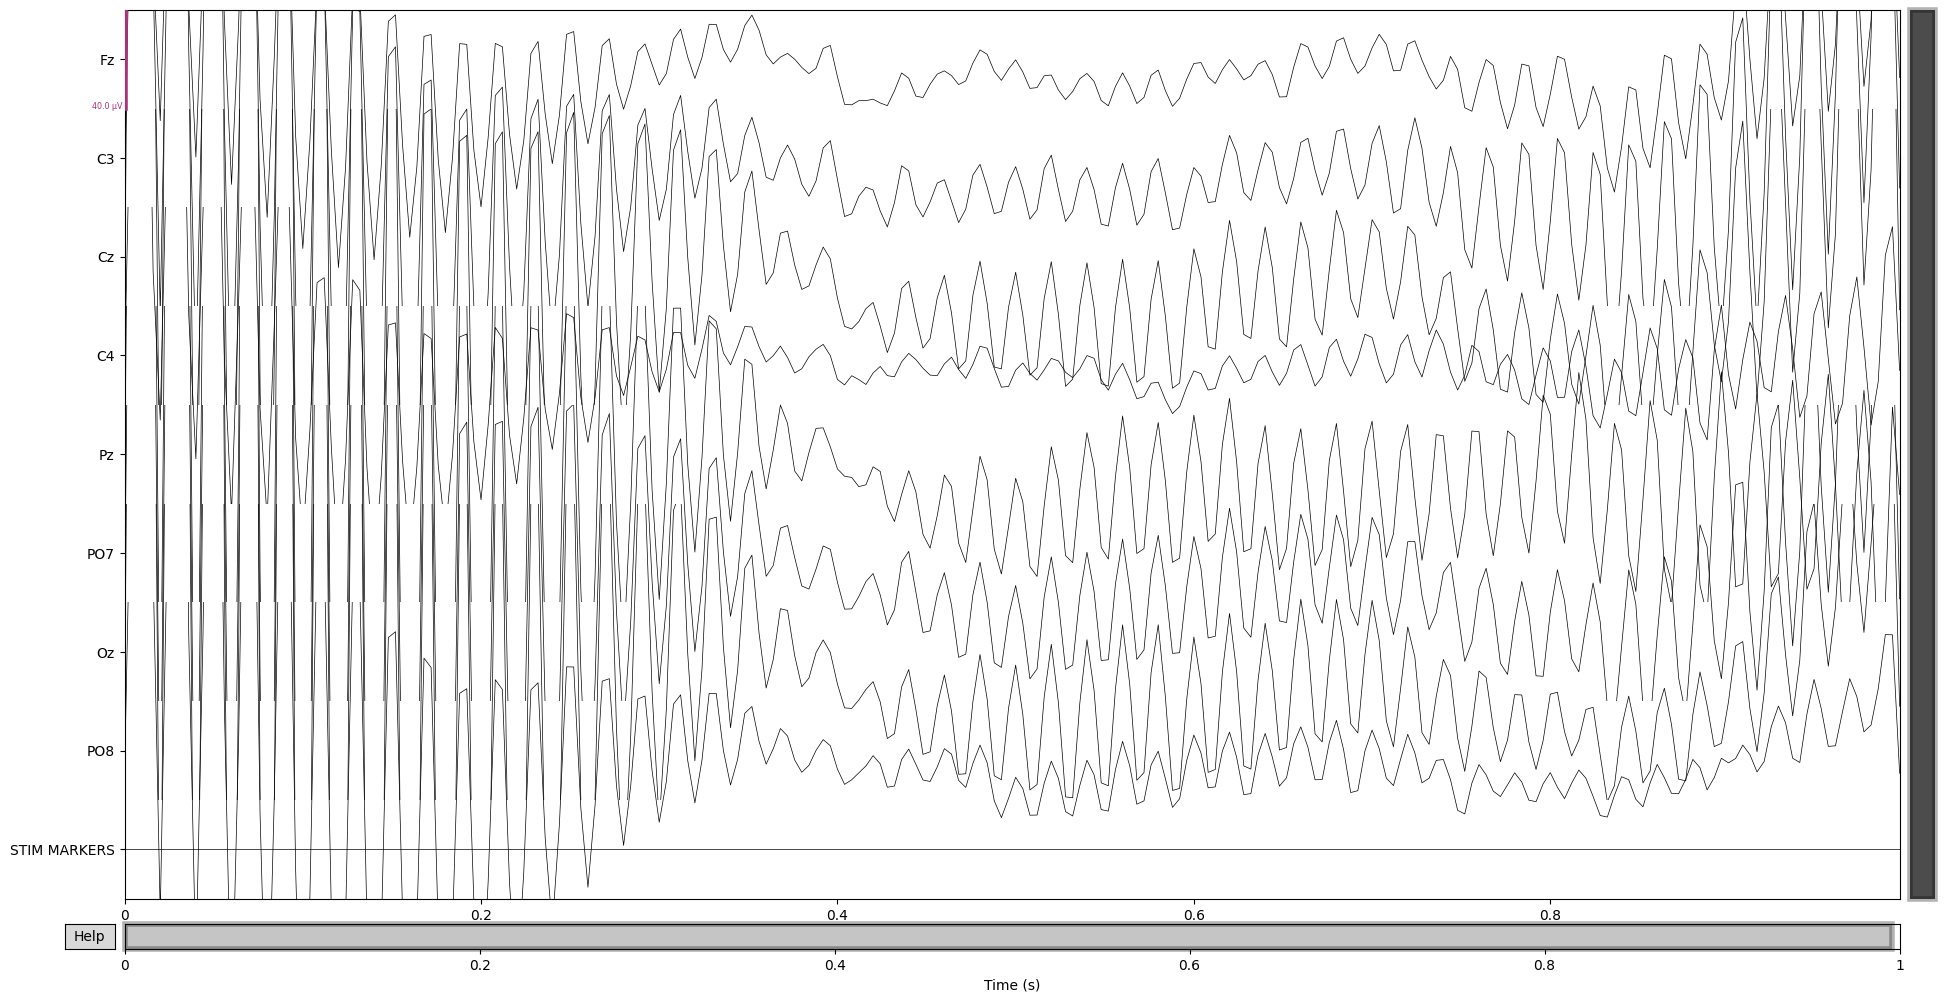

<RawArray | 9 x 250 (1.0 s), ~38 kB, data loaded>

In [2]:
fname = r"C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test1.fif"
raw =  mne.io.read_raw_fif(fname,  preload = True)
new_data = raw.get_data()[:,25*250:26*250]
print(new_data.shape)
raw_new = mne.io.RawArray(new_data, raw.info)
raw_new.notch_filter([50,100], trans_bandwidth = 3)
raw_new.filter(4,77)
raw_new.plot()
raw_new

Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test1.fif...
    Range : 0 ... 13810 =      0.000 ...    55.240 secs
Ready.
Reading 0 ... 13810  =      0.000 ...    55.240 secs...
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 1.50 Hz
- Upper transition bandwidth: 1.50 Hz
- Filter length: 551 samples (2.204 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 77 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower tr

C:\Users\bci\AppData\Local\Temp\ipykernel_8832\4093562058.py:4: RuntimeWarning: This filename (C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw =  mne.io.read_raw_fif(fname,  preload = True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Usi


Creating RawArray with float64 data, n_channels=9, n_times=8811
    Range : 0 ... 8810 =      0.000 ...    35.240 secs
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


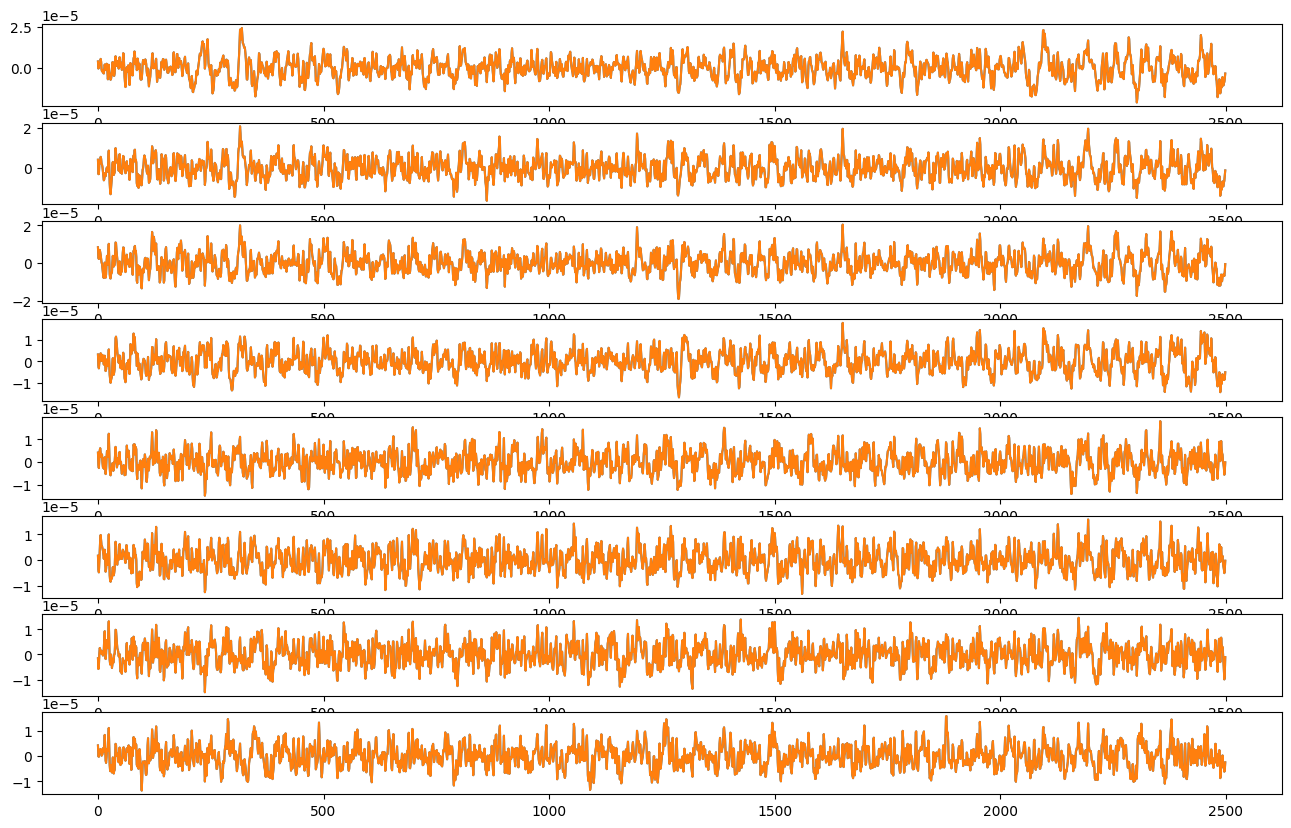

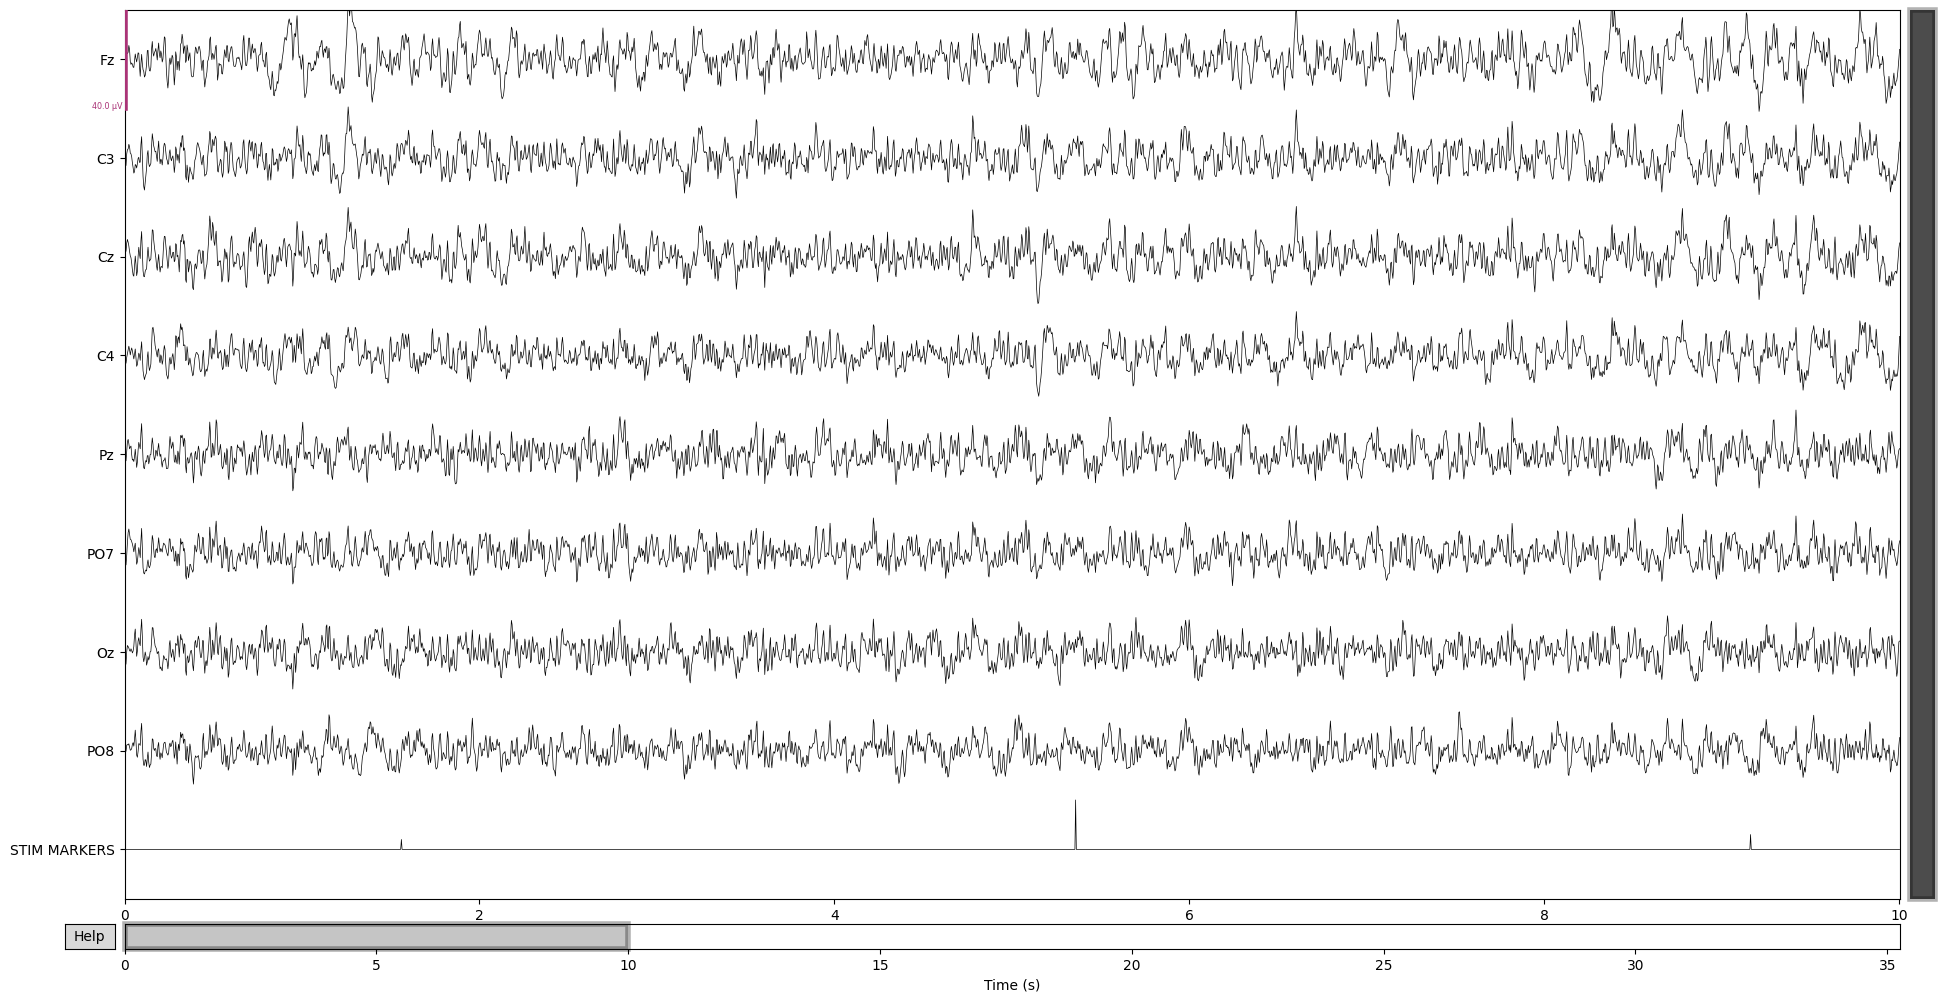

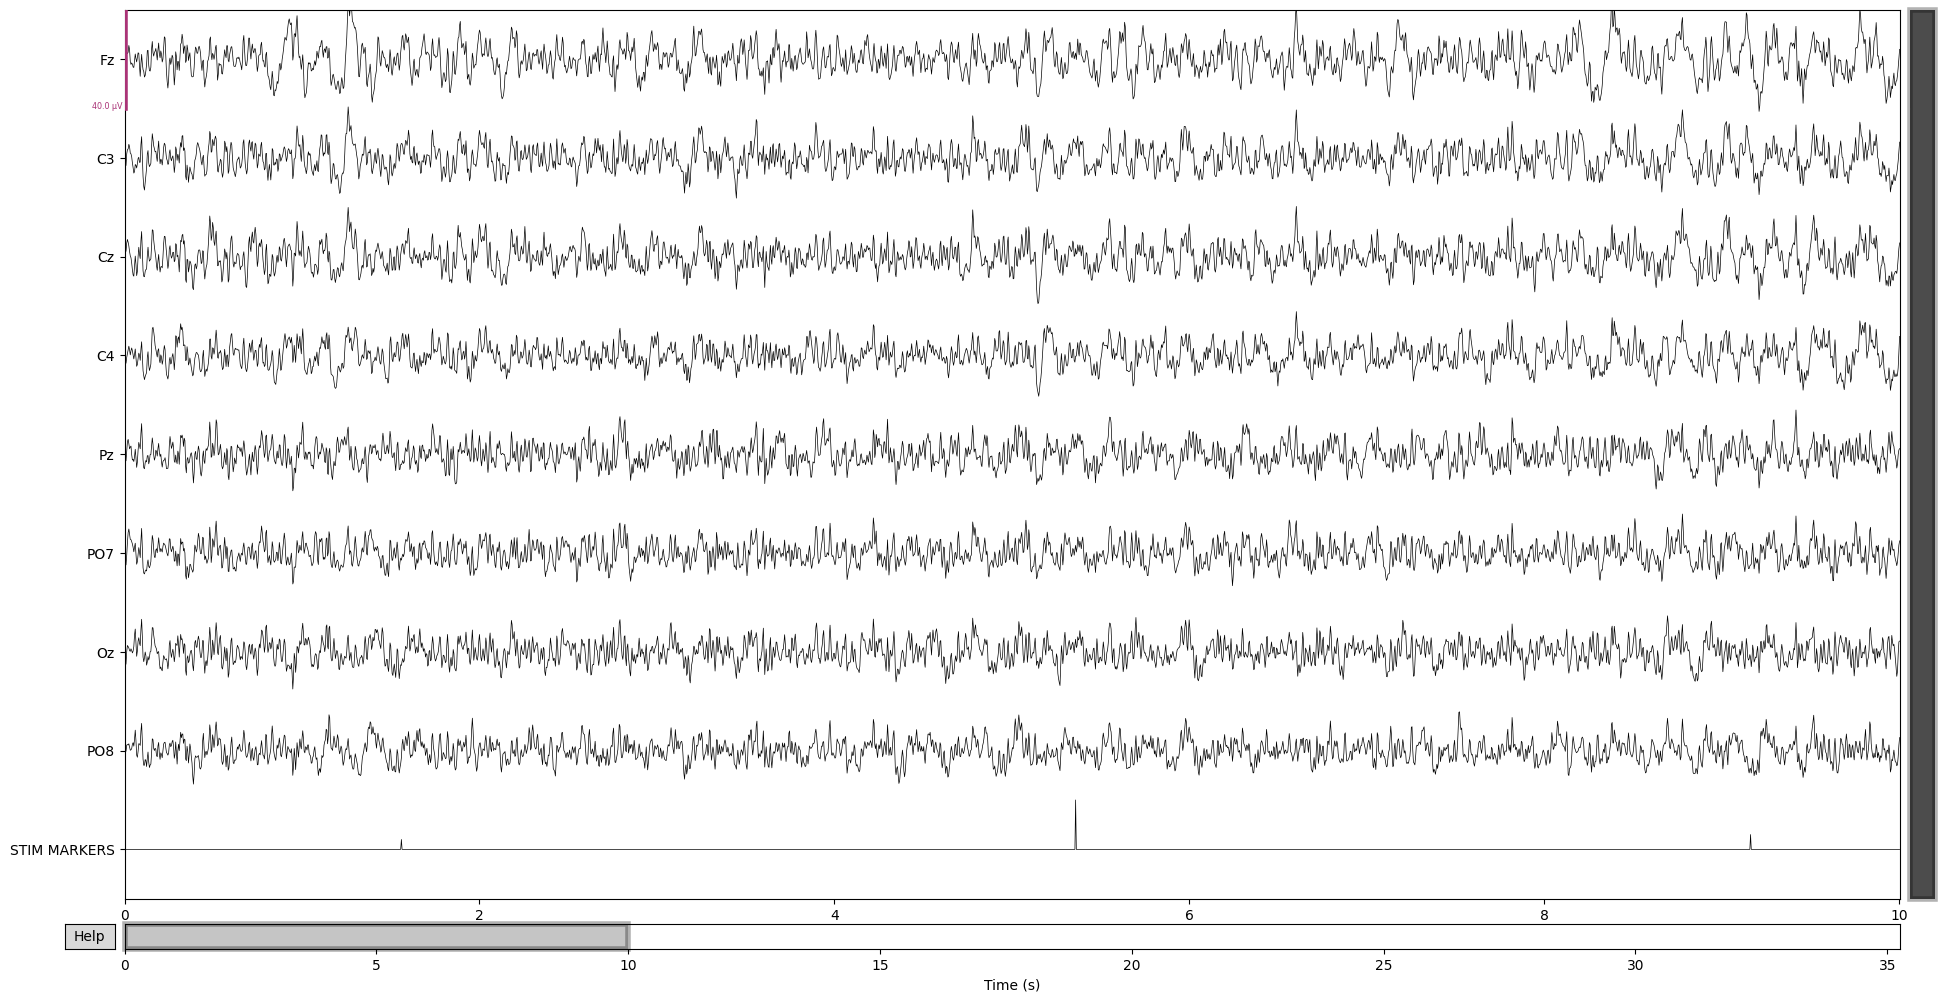

In [3]:
import matplotlib.pyplot as plt

fname = r"C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test1.fif"
raw =  mne.io.read_raw_fif(fname,  preload = True)
raw.notch_filter([50,100], trans_bandwidth = 3)
raw.filter(4,77)
fix,ax = plt.subplots(figsize=(16,10), nrows=8, ncols=1)
for i in range(8):
    ax[i].plot(raw.get_data()[i,10*250:-10*250][:10*250].T)

raw =  mne.io.read_raw_fif(fname,  preload = True)
raw.notch_filter([50,100], trans_bandwidth = 3)
raw.filter(4,77)
new_data = raw.get_data()[:,10*250:-10*250]
raw_new = mne.io.RawArray(new_data, raw.info)
for i in range(8):
    ax[i].plot(raw_new.get_data()[i,:][:10*250].T)
plt.show()
raw_new.plot()

In [4]:
raw.get_data()[i,10*250:-10*250][:10*250]

array([ 4.13046221e-06, -1.68063497e-07, -2.92736243e-07, ...,
       -6.16603606e-06, -5.73347587e-06, -2.50964325e-06])

sunsun_20230319
Here is the path
C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319\sunsun_202303190.fif
Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319\sunsun_202303190.fif...
    Range : 0 ... 14570 =      0.000 ...    58.280 secs
Ready.
Reading 0 ... 14570  =      0.000 ...    58.280 secs...
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 1.50 Hz
- Upper transition bandwidth: 1.50 Hz
- Filter length: 551 samples (2.204 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 77 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

C:\Users\bci\AppData\Local\Temp\ipykernel_8832\4224775489.py:15: RuntimeWarning: This filename (C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319\sunsun_202303190.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path, preload = True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend S

    Range : 0 ... 8798 =      0.000 ...    35.192 secs
Ready.
['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8', 'STIM MARKERS']
250.0
45 events found
Event IDs: [ 1  2  3 10 11 12 19 20 21]
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Effective window size : 1.024 (s)


c:\Users\bci\.virtualenvs\hybrid-ssvep-p300-speller-ZL_XZSnA\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


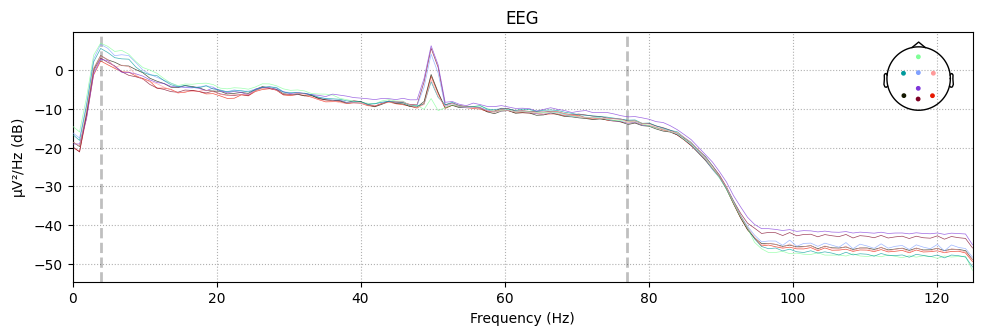

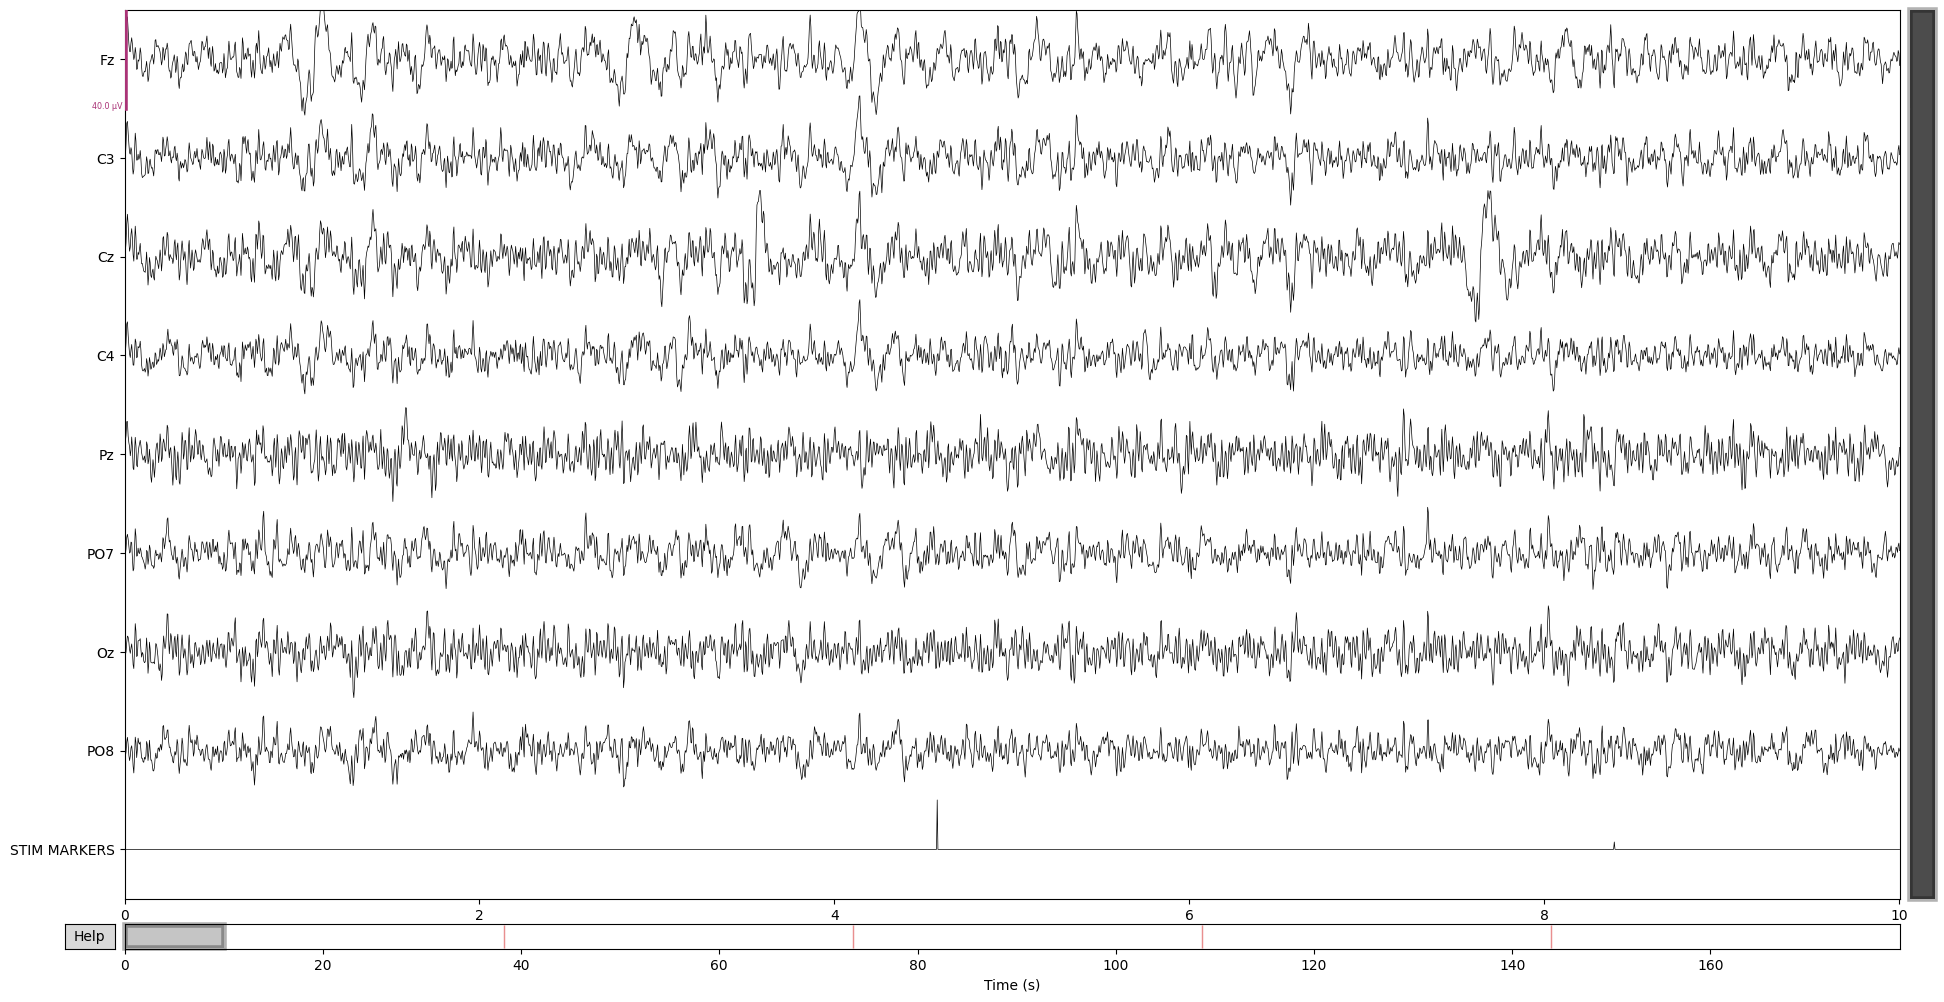

In [5]:
from scipy.signal import hilbert

subjects = ['sunsun_20230319']
raw = concat_dataset(subjects, 5)
# fname = "record\sunsun_9_flicker\sunsun_9_flicker4.fif"
# raw =  mne.io.read_raw_fif(fname)
# new_data = raw.get_data()[:,10*250:-10*250]
# raw = mne.io.RawArray(new_data, raw.info)
# raw.notch_filter([50,100], trans_bandwidth = 3)
# raw = raw.filter(4,77)
events = mne.find_events(raw)
epochs = mne.Epochs(raw=raw,events=events, baseline=None, tmin=0, tmax=3.7, reject=None, reject_by_annotation=False)
# epochs = mne.Epochs(raw=raw,events=events, baseline=(0,0.1), tmin=0, tmax=3, reject=None, reject_by_annotation=False)
raw.compute_psd().plot()
raw.plot()
plt.show()

sunsun_20230319_test
Here is the path
C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test0.fif
Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test0.fif...
    Range : 0 ... 14570 =      0.000 ...    58.280 secs
Ready.
Reading 0 ... 14570  =      0.000 ...    58.280 secs...
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 1.50 Hz
- Upper transition bandwidth: 1.50 Hz
- Filter length: 551 samples (2.204 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 77 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass fi

C:\Users\bci\AppData\Local\Temp\ipykernel_8832\4224775489.py:15: RuntimeWarning: This filename (C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_test\sunsun_20230319_test0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path, preload = True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using

    Range : 0 ... 8790 =      0.000 ...    35.160 secs
Ready.
['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8', 'STIM MARKERS']
250.0
45 events found
Event IDs: [ 1  2  3 10 11 12 19 20 21]
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Effective window size : 1.024 (s)


c:\Users\bci\.virtualenvs\hybrid-ssvep-p300-speller-ZL_XZSnA\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


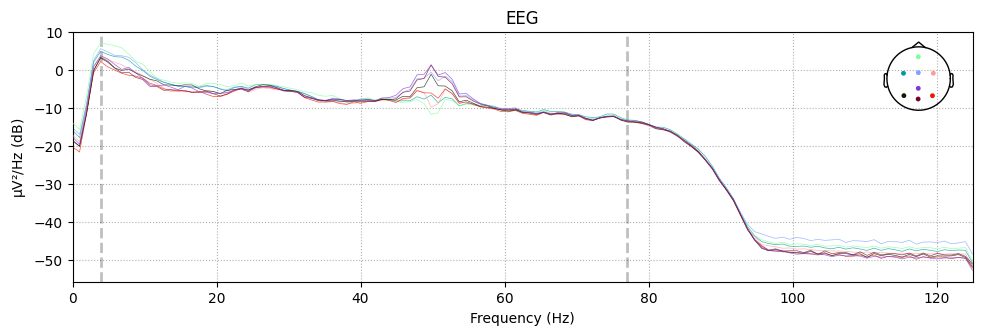

In [6]:
subjects = ['sunsun_20230319_test']
raw_test = concat_dataset(subjects, 5)
# fname = "record\sunsun_9_flicker\sunsun_9_flicker4.fif"
# raw =  mne.io.read_raw_fif(fname)
# new_test_data = raw.get_data()[:,10*250:-10*250]
# raw_test = mne.io.RawArray(new_test_data, raw.info)
# raw_test.notch_filter([50,100], trans_bandwidth = 3)
# raw_test = raw_test.filter(4,77)
events_test = mne.find_events(raw_test)
epochs_test = mne.Epochs(raw=raw_test,events=events_test, baseline=None, tmin=0, tmax=3.7, reject=None, reject_by_annotation=False)
# epochs_test = mne.Epochs(raw=raw_test,events=events_test, baseline=(0,0.1), tmin=0, tmax=3, reject=None, reject_by_annotation=False)
raw_test.compute_psd().plot()

In [7]:
from numpy import ndarray
import numpy as np
from scipy.sparse import vstack, identity, spmatrix
from typing import Optional, cast, Union
from scipy.linalg import eigh
from scipy.sparse.linalg import eigsh
from scipy.stats import pearsonr
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from joblib import Parallel, delayed
from functools import partial



def _ged_wong(
    Z: ndarray,
    D: Optional[ndarray] = None,
    P: Optional[ndarray] = None,
    n_components=1,
    method="type1",
):
    if method != "type1" and method != "type2":
        raise ValueError("not supported method type")

    A = Z
    if D is not None:
        A = D.T @ A
    if P is not None:
        A = P.T @ A
    A = A.T @ A
    if method == "type1":
        B = Z
        if D is not None:
            B = D.T @ Z
        B = B.T @ B
        if isinstance(A, spmatrix) or isinstance(B, spmatrix):
            D, W = eigsh(A, k=n_components, M=B)
        else:
            D, W = eigh(A, B)
    elif method == "type2":
        if isinstance(A, spmatrix):
            D, W = eigsh(A, k=n_components)
        else:
            D, W = eigh(A)

    D_exist = cast(ndarray, D)
    ind = np.argsort(D_exist)[::-1]
    D_exist, W = D_exist[ind], W[:, ind]
    return D_exist[:n_components], W[:, :n_components]


def _trca_kernel(X: ndarray):
    """TRCA.
    X: (n_trials, n_channels, n_samples)
    """
    X = np.reshape(X, (-1, *X.shape[-2:]))
    M, C, N = X.shape
    n_components = C
    P = vstack([identity(N) for _ in range(M)])
    P = P @ P.T
    Z = np.hstack(X).T  # type: ignore
    _, U = _ged_wong(Z, None, P, n_components=n_components)  # U for X
    return U


def _trca_feature(
    X: ndarray,
    templates: ndarray,
    Us: ndarray,
    n_components: int = 1,
    ensemble: bool = True,
):
    rhos = []
    if not ensemble:
        for Xk, U in zip(templates, Us):
            a = U[:, :n_components].T @ X
            b = U[:, :n_components].T @ Xk
            a = np.reshape(a, (-1))
            b = np.reshape(b, (-1))
            rhos.append(pearsonr(a, b)[0])
    else:
        U = Us[:, :, :n_components]
        U = np.concatenate(U, axis=-1)
        for Xk in templates:
            a = U.T @ X
            b = U.T @ Xk
            a = np.reshape(a, (-1))
            b = np.reshape(b, (-1))
            rhos.append(pearsonr(a, b)[0])
    return rhos


class TRCA(BaseEstimator, TransformerMixin, ClassifierMixin):
    def __init__(
        self, n_components: int = 1, ensemble: bool = True, n_jobs: Optional[int] = None
    ):
        self.n_components = n_components
        self.ensemble = ensemble
        self.n_jobs = n_jobs

    def fit(self, X: ndarray, y: ndarray, Yf: Optional[ndarray] = None):
        self.classes_ = np.unique(y)
        X = np.reshape(X, (-1, *X.shape[-2:]))
        X = X - np.mean(X, axis=-1, keepdims=True)
        self.templates_ = np.stack(
            [np.mean(X[y == label], axis=0) for label in self.classes_]
        )

        self.Us_ = np.stack([_trca_kernel(X[y == label]) for label in self.classes_])
        return self

    def transform(self, X: ndarray):
        X = np.reshape(X, (-1, *X.shape[-2:]))
        X = X - np.mean(X, axis=-1, keepdims=True)
        n_components = self.n_components
        templates = self.templates_
        Us = self.Us_
        ensemble = self.ensemble
        rhos = Parallel(n_jobs=self.n_jobs)(
            delayed(
                partial(
                    _trca_feature, Us=Us, n_components=n_components, ensemble=ensemble
                )
            )(a, templates)
            for a in X
        )
        rhos = np.stack(rhos)
        return rhos

    def predict(self, X: ndarray):
        feat = self.transform(X)
        labels = self.classes_[np.argmax(feat, axis=-1)]
        return labels, feat


def generate_cca_references(
    freqs,
    srate,
    T,
    phases: Optional[Union[ndarray, int, float]] = None,
    n_harmonics: int = 1,
):
    if isinstance(freqs, int) or isinstance(freqs, float):
        freqs = [freqs]
    freqs = np.array(freqs)[:, np.newaxis]
    if phases is None:
        phases = 0
    if isinstance(phases, int) or isinstance(phases, float):
        phases = np.array([phases])
    phases = np.array(phases)[:, np.newaxis]
    t = np.linspace(0, T, int(T * srate))

    Yf = []
    for i in range(n_harmonics):
        Yf.append(
            np.stack(
                [
                    np.sin(2 * np.pi * (i + 1) * freqs * t + np.pi * phases),
                    np.cos(2 * np.pi * (i + 1) * freqs * t + np.pi * phases),
                ],
                axis=1,
            )
        )
    Yf = np.concatenate(Yf, axis=1)
    return Yf

In [8]:
X_train = epochs.get_data()[:,:-1,:-1]
print(X_train.shape)
dropped_epochs = [n for n, dl in enumerate(epochs.drop_log) if len(dl)]  # result is a list
print(dropped_epochs)

Using data from preloaded Raw for 45 events and 926 original time points ...
1 bad epochs dropped
(44, 8, 925)
[44]


In [9]:
print(dropped_epochs)

[44]


In [10]:
import numpy as np

events = np.delete(events, dropped_epochs, axis=0)
events[:,-1].shape

(44,)

In [11]:
y_train = events[:,-1]

In [12]:
X_test = epochs_test.get_data()[:,:-1,:-1]
print(X_test.shape)
dropped_epochs_test = [n for n, dl in enumerate(epochs_test.drop_log) if len(dl)]  # result is a list
print(dropped_epochs_test)

Using data from preloaded Raw for 45 events and 926 original time points ...
1 bad epochs dropped
(44, 8, 925)
[44]


In [13]:
events_test = np.delete(events_test, dropped_epochs_test, axis=0)
y_test = events_test[:,-1]

In [14]:
from sklearn.utils import shuffle

FREQS = [8, 8.2, 8.4, 8.6, 8.8, 9, 9.2, 9.4, 9.6]
PHASES = [0 , 0.35 , 0.70 , 1.05 , 1.40 , 1.75, 0.10, 0.45, 0.80 ]

Yf = generate_cca_references(freqs=FREQS, srate=250, T=3.7, phases=PHASES, n_harmonics=5)
# Yf = generate_cca_references(freqs=FREQS, srate=250, T=3, phases=PHASES, n_harmonics=5)

estimator=TRCA(n_components = 1, n_jobs=-1)

model = estimator.fit(X_train, y_train, Yf)
# X_test, y_test = shuffle(X_test, y_test)
# preds = model.predict(X_test)
# acc = np.mean(preds==y_test)
# print(preds)
# print(y_test)
# print(acc)

In [15]:
import pickle

# save the model to disk
filename = 'TRCA_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [16]:
loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result)

In [17]:
X_test, y_test = shuffle(X_test, y_test)
# preds = loaded_model.predict(X_test)
preds,_ = model.predict(X_test)
acc = np.mean(preds==y_test)
print(preds)
print(y_test)
print(acc)

[ 1  2  1 10  1  2  3 12  1 12 20 12 20 12  3 10 11  3 10 12  1 21 19 11
  2 20  2 19  3 12  1  1 12 19 10 21 21 11 20 21  1  1 12 20]
[ 2 20 11 11  3 21  3 10  3 21 20  1  1 19  1 21 11  2  1 21 19  2 10 20
 11 11 12 19  3 19 19 12 10 20 10 10  1  2 20 21 12 12  2 12]
0.18181818181818182


In [18]:
preds = model.predict(X_test[0])
print(X_test[0].shape)
print(preds)
print(y_test)

(8, 925)
(array([1], dtype=int64), array([[ 0.09745436,  0.02912242, -0.03635332,  0.03443492,  0.01986022,
        -0.00962247,  0.05820168,  0.07564226, -0.04481137]]))
[ 2 20 11 11  3 21  3 10  3 21 20  1  1 19  1 21 11  2  1 21 19  2 10 20
 11 11 12 19  3 19 19 12 10 20 10 10  1  2 20 21 12 12  2 12]


Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\69.08629719999954C.fif...
    Range : 0 ... 1252 =      0.000 ...     5.008 secs
Ready.
Reading 0 ... 1252  =      0.000 ...     5.008 secs...
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 1.50 Hz
- Upper transition bandwidth: 1.50 Hz
- Filter length: 551 samples (2.204 sec)



C:\Users\bci\AppData\Local\Temp\ipykernel_8832\3449668097.py:5: RuntimeWarning: This filename (C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\69.08629719999954C.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fname, preload = True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


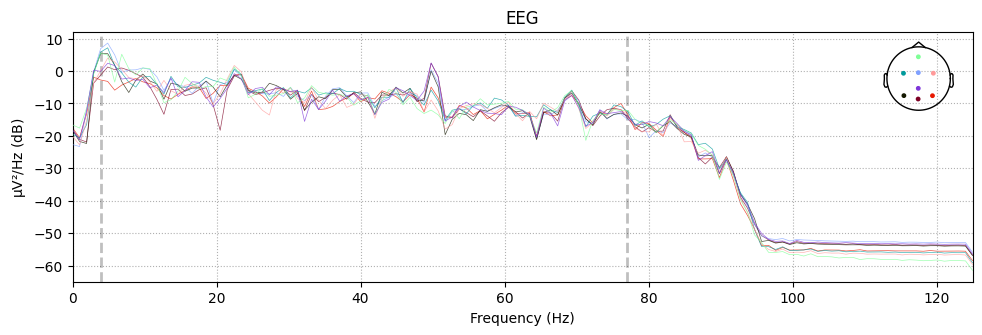

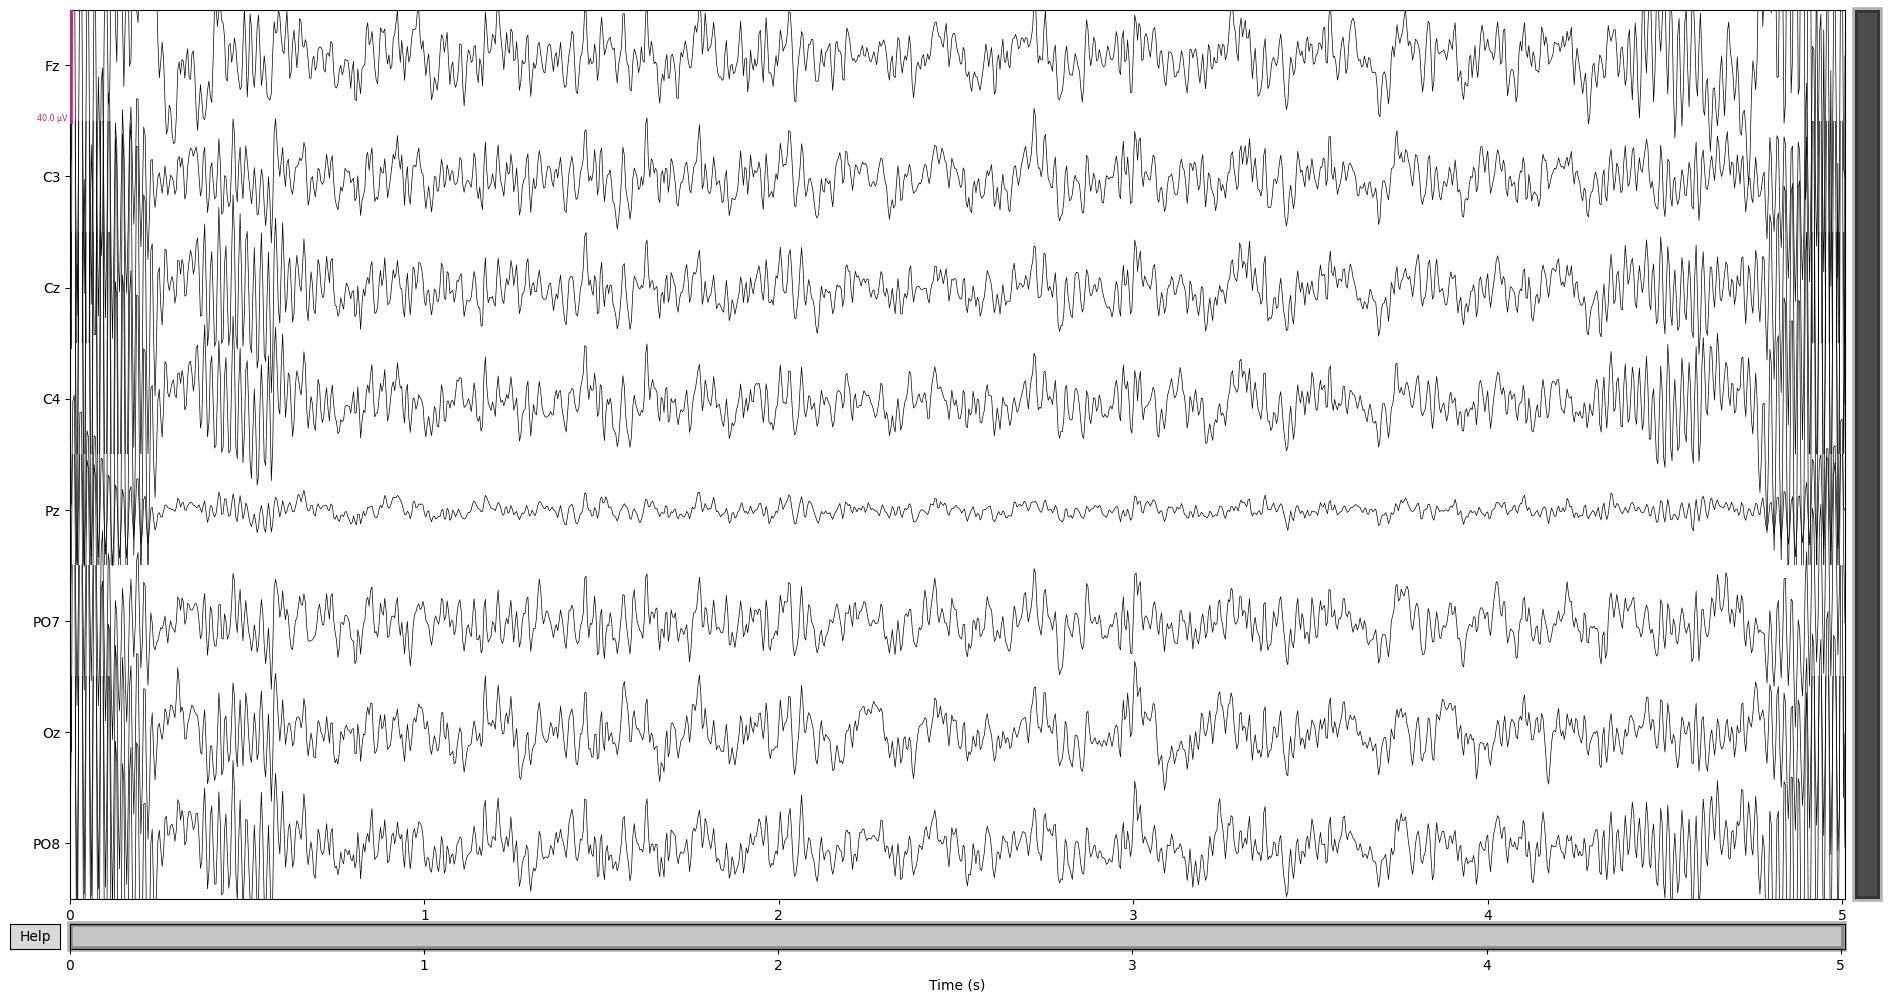

Not setting metadata
1 matching events found
Setting baseline interval to [1.0, 4.7] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 926 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 926 original time points ...


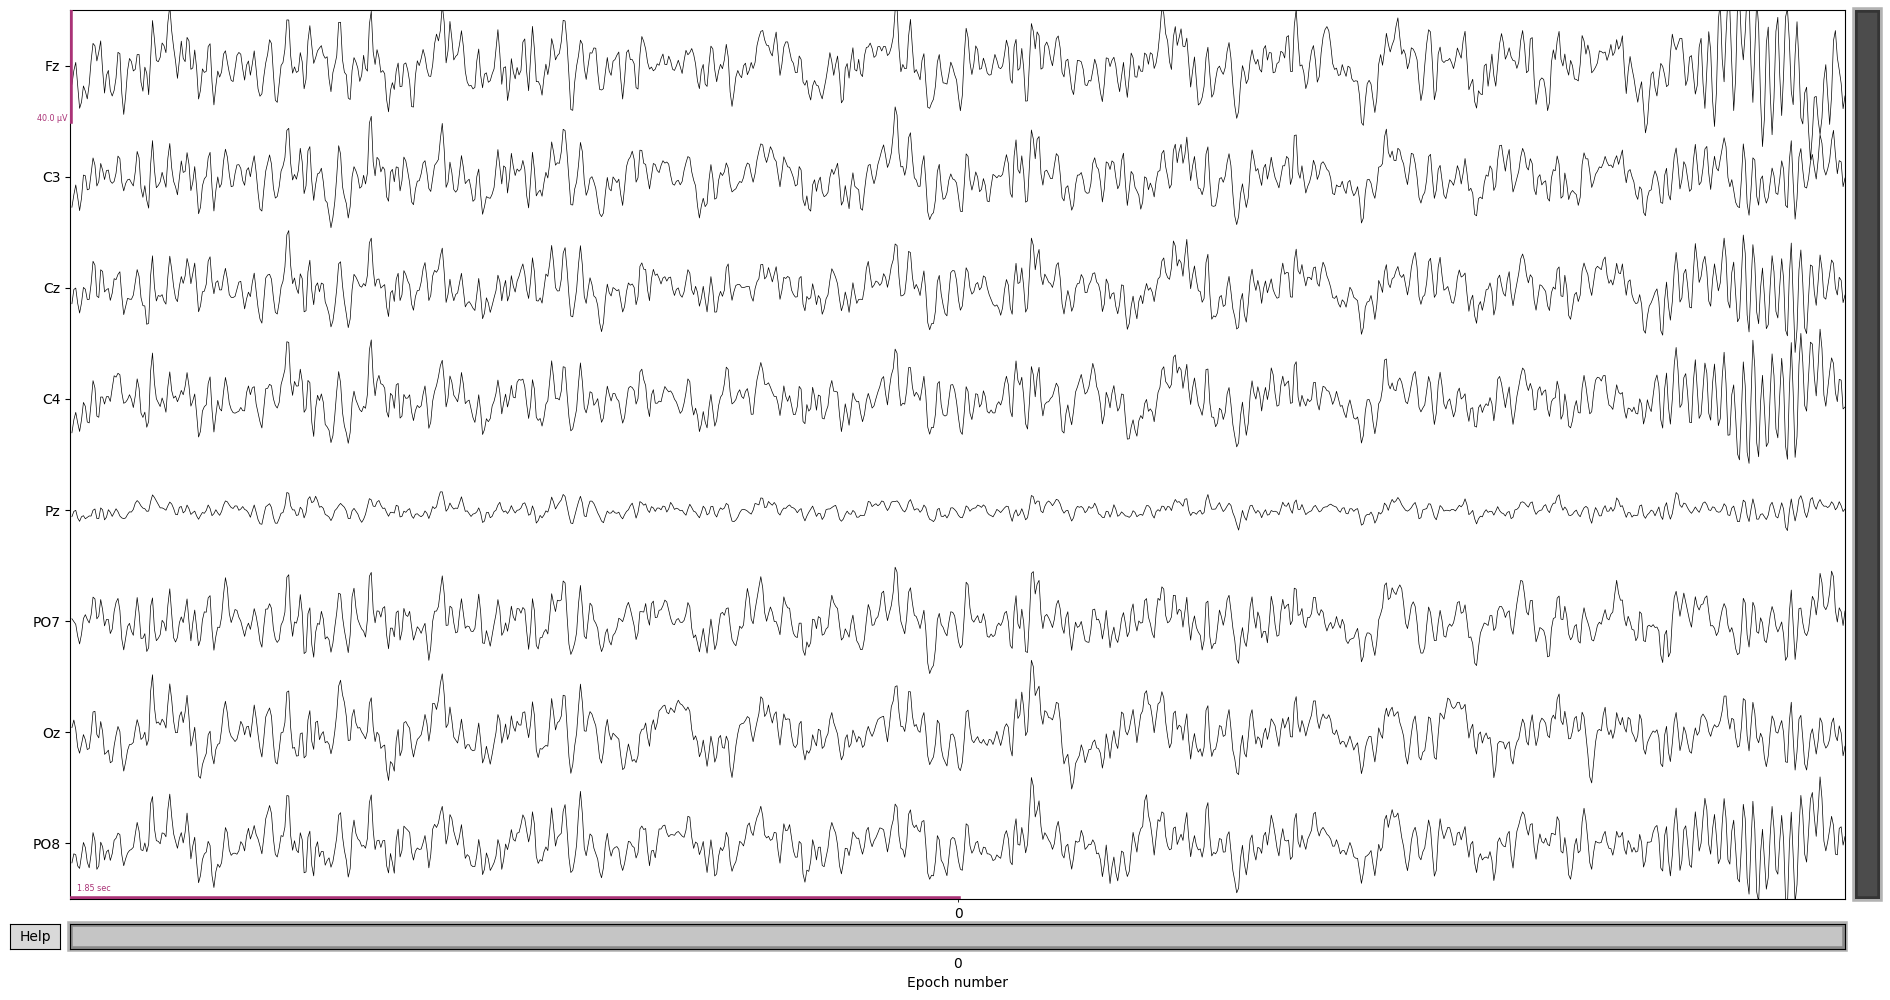

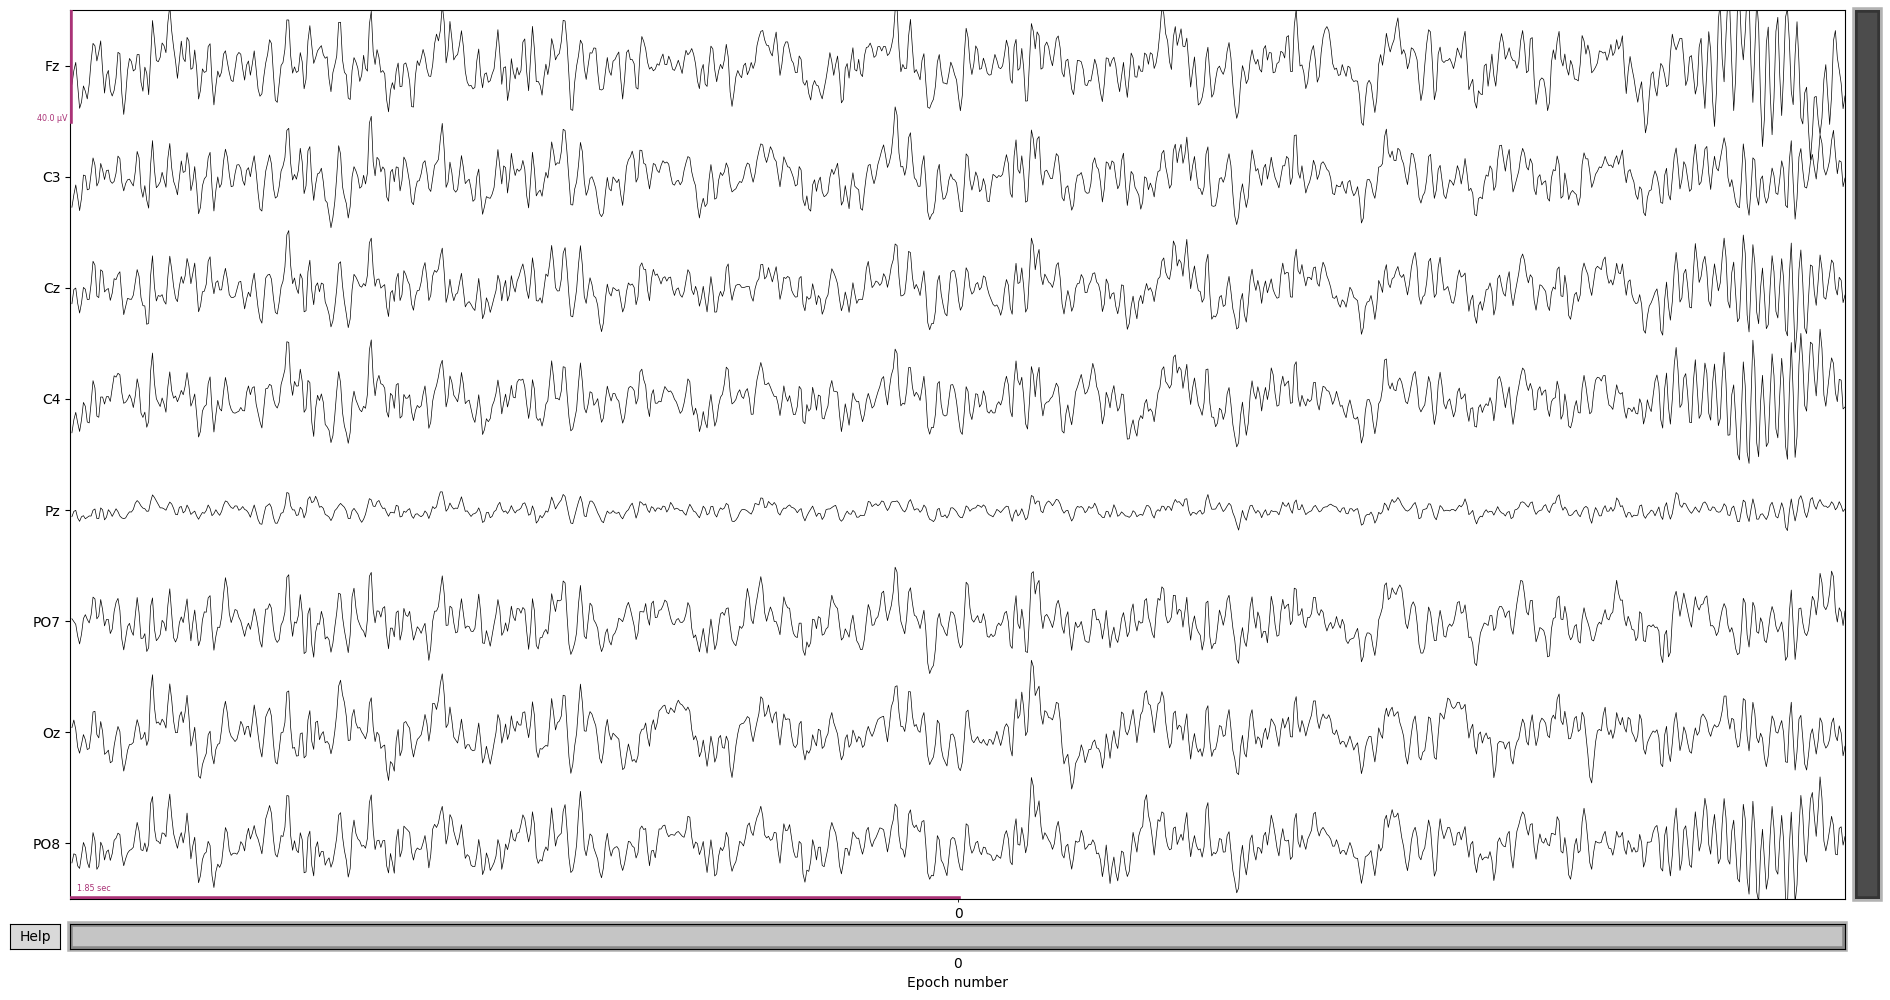

In [38]:
# fname = r"C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\105.96824729999935B.fif"
# fname = r"C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\30.55084010000064C.fif"
# fname = r"C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\75.88466029999836U.fif"
fname = r"C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\87.2017207000008A.fif"
raw = mne.io.read_raw_fif(fname, preload = True)
raw.notch_filter([50,10], trans_bandwidth = 3)
raw.plot()

epoch = mne.Epochs(raw, events=[[0,0,1]], tmin=1, tmax=4.7, baseline=(None,None))
epoch.plot()
# raw.notch_filter(50, notch_widths=10)
# raw.compute_psd().plot()

Creating RawArray with float64 data, n_channels=8, n_times=925
    Range : 0 ... 924 =      0.000 ...     3.696 secs
Ready.
Effective window size : 1.024 (s)


c:\Users\bci\.virtualenvs\hybrid-ssvep-p300-speller-ZL_XZSnA\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


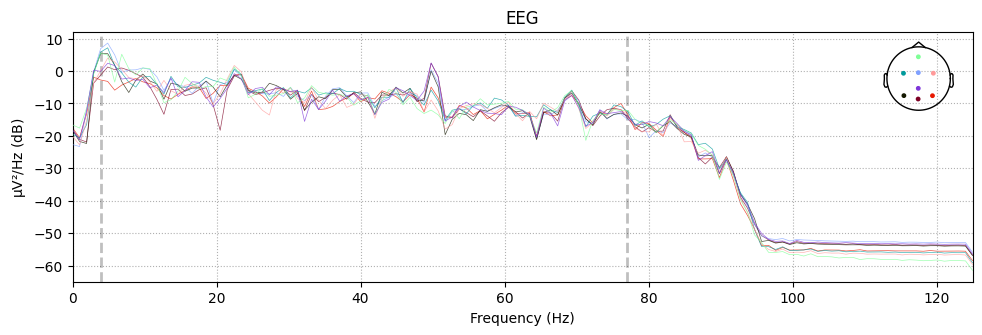

In [39]:
check_data = mne.io.RawArray(X_test[0], raw.info)
check_data.compute_psd().plot()

In [40]:
data = raw.get_data()[:,:925]
data.shape

(8, 925)

In [42]:
d = epoch.get_data().squeeze()[:,:925]
d.shape
# d = np.hstack([ np.zeros((8,274)) ,d, np.zeros((8,275)) ])

Using data from preloaded Raw for 1 events and 926 original time points ...


(8, 925)

In [43]:
def cca_reference(list_freqs, fs, num_smpls, phases: Optional[Union[ndarray, int, float]] = None, num_harms=3):
    num_freqs = len(list_freqs)
    tidx = np.arange(1, num_smpls + 1) / fs  # time index

    y_ref = np.zeros((num_freqs, 2 * num_harms, num_smpls))
    for freq_i in range(num_freqs):
        tmp = []
        for harm_i in range(1, num_harms + 1):
            stim_freq = list_freqs[freq_i]  # in HZ
            stim_phase = phases[freq_i]
            # Sin and Cos
            tmp.extend([np.sin(2 * np.pi *  tidx * harm_i * stim_freq + (np.pi * stim_phase)),
                        np.cos(2 * np.pi * tidx * harm_i * stim_freq + (np.pi * stim_phase))])
        y_ref[freq_i] = tmp  # 2*num_harms because include both sin and cos

    return y_ref

In [44]:
from sklearn.cross_decomposition import CCA
from filterbank import filterbank
from scipy.stats import mode

def fbcca_realtime(eeg, list_freqs, list_phases, fs, num_harms=3, num_fbs=5):
    # print("EEG shape: ", eeg.shape)

    fb_coefs = np.power(np.arange(1, num_fbs + 1), (-1.25)) + 0.25

    num_targs = len(list_freqs)
    # print("HERE IS THE EEG SHAPE", eeg.shape)
    _, num_smpls = eeg.shape  # 40 taget (means 40 fre-phase combination that we want to predict)
    y_ref = cca_reference(list_freqs, fs, num_smpls, list_phases, num_harms)
    cca = CCA(n_components=1)  # initilize CCA

    # result matrix
    r = np.zeros((num_fbs, num_targs))
    results = np.zeros(num_targs)
    r_tmp_mode = []
    r_tmp_corr_avg = []

    
    test_tmp = np.squeeze(eeg[:, :])  # deal with one event a time
    for fb_i in range(num_fbs):  # filter bank number, deal with different filter bank
        for class_i in range(num_targs):
            testdata = filterbank(test_tmp, fs, fb_i)  # data after filtering
            refdata = np.squeeze(y_ref[class_i, :, :])  # pick corresponding freq target reference signal
            test_C, ref_C = cca.fit_transform(testdata.T, refdata.T)
            # len(row) = len(observation), len(column) = variables of each observation
            # number of rows should be the same, so need transpose here
            # output is the highest correlation linear combination of two sets
            r_tmp, _ = pearsonr(np.squeeze(test_C),
                                np.squeeze(ref_C))  # return r and p_value, use np.squeeze to adapt the API
            if r_tmp == np.nan:
                r_tmp = 0
            r[fb_i, class_i] = r_tmp
    rho = np.dot(fb_coefs, r)  # weighted sum of r from all different filter banks' result
    print("rho: ", rho)
    result = np.argmax(rho) # get maximum from the target as the final predict (get the index), and index indicates the maximum entry(most possible target)
    # print("result: ", result)
    r_tmp_mode.append(result)
    print("correlation: ", abs(rho[result]))
    r_tmp_corr_avg.append(abs(rho[result]))
    r_mode = mode(r_tmp_mode)[0][0]
    r_corr_avg = np.mean(r_tmp_corr_avg)
    print("====Most recurrent class: ====", r_mode)
    print("====Average correlation: =====", r_corr_avg)

    THRESHOLD = 0.3
    if r_corr_avg >= THRESHOLD:  # 2.749=np.sum(fb_coefs*0.85)
        return r_mode  # if the correlation isn't big enough, do not return any command

In [46]:
list_freqs = FREQS
list_phases = PHASES
TARGET_CHARACTERS:list = ["A", "B", "C", "J", "K", "L", "S", "T", "U"]
fs = 250
num_harms = 5
num_fbs = 5

# result = fbcca_realtime(data, list_freqs, list_phases, fs, num_harms, num_fbs)
result = fbcca_realtime(d, list_freqs, list_phases, fs, num_harms, num_fbs)
print(TARGET_CHARACTERS[result])
# ["A", "B", "C", "J", "K", "L", "S", "T", "U"]
# [8,    8.2, 8.4, 8.6, 8.8, 9, 9.2, 9.4, 9.6]
# [0 , 0.35 , 0.70 , 1.05 , 1.40 , 1.75, 0.10, 0.45, 0.80 ]

rho:  [1.01215473 0.99176363 1.06868855 1.13042383 0.90023886 0.74959085
 0.90280286 0.87803502 0.74570071]
correlation:  1.13042383492675
====Most recurrent class: ==== 3
====Average correlation: ===== 1.13042383492675
J


C:\Users\bci\AppData\Local\Temp\ipykernel_8832\3273781414.py:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  r_mode = mode(r_tmp_mode)[0][0]


In [47]:
MARKERS:dict = {"A": 1.0, "B": 2.0, "C": 3.0, "D": 4.0, "E": 5.0, "F": 6.0, "G": 7.0, "H": 8.0, "I": 9.0, "J": 10.0, "K": 11.0, "L": 12.0, "M": 13.0, "N": 14.0, "O": 15.0, "P": 16.0, "Q": 17.0, "R": 18.0, "S": 19.0, "T": 20.0, "U": 21.0, "V": 22.0, "W": 23.0, "X": 24.0, "Y": 25.0, "Z": 26.0, "0": 27.0, "1": 28.0, "2": 29.0, "3": 30.0, "4": 31.0, "5": 32.0, "6": 33.0, "7": 34.0, "8": 35.0, "9": 36.0, ".": 37.0, "?": 38.0, ",": 39.0, "(": 40.0, "Space": 41.0, ")": 42.0, "!": 43.0, "-": 44.0, "<<":45.0, "trial_start":99.0}
# loaded_model = pickle.load(open(r"C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\TRCA_model.sav", 'rb'))
# result = loaded_model.predict(d)
result,rhos = model.predict(d)
print("Here is the result", result)
print(list(filter(lambda x: MARKERS[x] == result[0], MARKERS))[0])
rhos

Here is the result [20]
T


array([[-0.08784912, -0.09035313, -0.05075153, -0.04981069, -0.00445977,
         0.00651664,  0.03078364,  0.03959391, -0.07145212]])